In [1]:
from wflytes.dataProcessing.wfFetcher import WfFetcher
import seaborn as sns
import datetime
from tqdm.autonotebook import tqdm
tqdm.pandas()
import pandas as pd

wff = WfFetcher()

/tmp/ipykernel_3815733/2593620837.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Demonstrate Waveform Fetcher

In [7]:
# What hadms are available for sampling?
wf_name = "II"
admissions = pd.read_csv("mimiciii/ADMISSIONS.csv").sample(1000)
admissions['wf_available'] = admissions['HADM_ID'].progress_apply(lambda h: wff.precheck_hadm_has_data(h, wf_name))
admissions[admissions['wf_available']]['HADM_ID']

  0%|          | 0/1000 [00:00<?, ?it/s]

50662    120814
56806    125524
52199    177745
12217    123808
46759    121572
          ...  
23070    156358
23460    172265
7410     142691
2585     139887
57329    115445
Name: HADM_ID, Length: 162, dtype: int64

<AxesSubplot:xlabel='time', ylabel='II'>

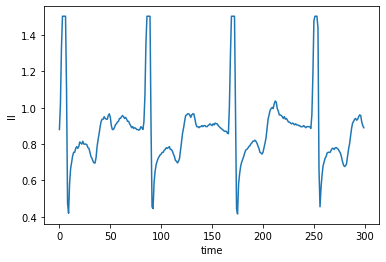

In [8]:
sample_hadm_id = 180162
sample_ii = wff.get_wf_anyinterval(sample_hadm_id, wf_name, datetime.timedelta(minutes=5))

plot_size = 300
plottable = pd.DataFrame(data={'time': range(0, plot_size), wf_name: sample_ii[0:plot_size]})
sns.lineplot(data=plottable, x='time', y=wf_name)